# Projeto 2 - C Dados

_Português - Este Projeto está atualmente sendo mantido por Enricco Gemha, Paola BBS Friedel, Rafael C Leventhal, Marcelo R Barranco._

_English - This Project is currently being held by Enricco Gemha, Paola BBS Friedel, Rafael C Leventhal, Marcelo R Barranco._

# Prólogo

Este projeto tem como escopo responder a seguinte questão: "Dado que o aluno reprovou em uma matéria escolar no ano anterior, qual a chance dele ter sua média final maior que 5 no ano seguinte ?". 

Portanto, buscamos predizer o comportamento de um aluno no ano seguinte de sua reprovação. Para isso devemos levar em conta o significado do termo conhecido como **nota escolar**, sendo a avaliação de um professor sobre o esforço do aluno, seja este situado em qualquer parte do sistema de ensino. Para mensurar avaliação são estabelecidas provas escritas (ou orais) e trabalhos extras (individuais ou em grupo). Para efeitos desse projeto, a nota escolar será mensurada por valores inteiros de 0 a 20.

<img src="img/boletim_escolar.png" alt="boletim escolar" width="500"/>

##### acima temos uma imagem que exemplifica o documento que descreve as notas escolares, conhecido como boletim escolar 

# Base de dados

Para podermos versar sobre o objetivo descrito acima, necessitamos de uma base de dados sobre o assunto para analisar. Assim, escolheu-se o "Student Grade Prediction", ou Predição da Nota Escolar de Aluno: [database](https://www.kaggle.com/dipam7/student-grade-prediction). Ela é cortesia da University of California Irvine (UCI).

## Target

`G3`: foi escolhida como o target, ou seja, a variável que será o foco da relação com outras variáveis.
O target escolhido é do tipo Quantitativo, sendo a nota escolar de um aluno, que varia entre 0 e 20.

## Features

`sex` - sexo do estudante (binário: 'F' - feminino ou 'M' - masculino)

`age` - idade do estudante (numérico: de 15 a 22)

`address` - tipo do endereço de residência do estudante (binário: 'U' - urbano ou 'R' - rural)

`famsize` - tamanho da família do estudante (binário: 'LE3' - maior ou igual a 3 ou 'GT3' - maior que 3)

`Pstatus` - status de relacionamento dos pais (binário: 'T' - morando juntos ou 'A' - separados)

`Medu` - educação da mãe (numérico: 0 - nenhum, 1 - educação primária (4a série), 2 - 5a a 9a série, 3 - educação secundária ou 4 - educação superior)

`Fedu` - educação do pai (numérico: 0 - nenhum, 1 - educação primária (4a série), 2 - 5a a 9a série, 3 - educação secundária ou 4 - educação superior)

`Mjob` - trabalho da mãe (nominal: 'teacher', 'health' relacionado, civil 'services' (ex: policial), 'at_home' ou 'other')

`Fjob` - trabalho do pai (nominal: 'teacher', 'health' relacionado, civil 'services' (ex: policial), 'at_home' ou 'other')

`reason` - razão para escolher a escola (nominal: perto de 'home', 'reputation' da escola, preferencia de 'course' ou 'other')

`guardian` - guardião do estudante (nominal: 'mother', 'father' ou 'other')

`traveltime` - tempo de viagem a escola (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, ou 4 - >1 hora)

`studytime` - tempo de estudo diário (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas)

`failures` - número de reprovações (numérico: `n` se o tamanho<=`n`<3, outro `n`=4)

`schoolsup` - suporte educacional extra (binário: yes ou no)

`famsup` - family educational support (binário: yes ou no)

`paid` - aulas extras pagas (binário: yes ou no)

`activities` - faz atividades extra-curricular (binário: yes ou no)

`nursery` - visitou a enfermaria da escola (binário: yes ou no)

`higher` - quer cursar ensino superior (binário: yes ou no)

`internet` - tem acesso à Internet em casa (binário: yes ou no)

`romantic` - em um relacionamento romântico (binário: yes ou no)

`famrel` - qualidade do relacionamento familiar (numérico: de 1 - muito ruim a 5 - excelente)

`freetime` - tempo livre depois da escola (numérico: de 1 - muito baixa a 5 - muito alta)

`goout` - sai com os amigos (numérico: de 1 - muito baixa a 5 - muito alta)

`Dalc` - consumo de álcool em dia de trabalho (numérico: de 1 - muito baixa a 5 - muito alta)

`Walc` - consumo de álcool no final de semana (numérico: de 1 - muito baixa a 5 - muito alta)

`health` - status atual de saúde (numérico: de 1 - muito baixo a 5 - muito bom)

`absences` - número de faltas nas aulas (numérico: de 0 a 93)

# Considerações iniciais
Para nos referirmos a certos termos recorrentes, usaremos abreviações, todas listadas abaixo:
- df: DataFrame;
- pd: biblioteca do Python chamada Pandas.

# Kickstart do Projeto

Importando bibliotecas que serão utilizadas e definindo ajustes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import os

Visualizando o diretório no qual iremos trabalhar.

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/home/enricco/Documents/Project2_Data_Science


Lendo o dataset e visualizando o df.

In [3]:
students = pd.read_csv('dataset/students.csv')
students.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Limpando o df

Retirar do df as features (colunas) cujas informações não são relevantes a este projeto.

In [4]:
students.drop(columns='school', inplace=True)
students

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,U,LE3,A,2,2,services,services,course,...,5,5,4,4,5,4,11,9,9,9
391,M,17,U,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,3,14,16,16
392,M,21,R,GT3,T,1,1,other,other,course,...,5,5,3,3,3,3,3,10,8,7
393,M,18,R,LE3,T,3,2,services,other,course,...,4,4,1,3,4,5,0,11,12,10


# Estabelecendo o df de treinamento

A próxima etapa é transformar o df `students`, criando variáveis dummies para as colunas que contém variáveis qualitativas, e, por fim, criando um novo df, `train`, para treinamento do classificador (que veremos mais a frente).

In [5]:
train = students.copy()
label_dummies = []
for column in train.columns:
    if train[column].dtype.kind == 'O':
        dummies = pd.get_dummies(train[column]).iloc[:, 1:]
        label_dummies.append(dummies.columns.values.tolist())
        dummies.columns = [f'{column}_{col}' for col in dummies.columns]
        train = pd.concat(
            [
                train, dummies
            ], axis=1
        )
        train.drop(columns=column, inplace=True)
train.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


# Análise Exploratória

## Features x Features

Antes de iniciarmos o treinamento com nosso classificador, devemos fazer a análise exploratória dos dados que possuímos em mãos.

Portanto, começamos separando o target e as features em arrays diferentes, respectivamente, `target` e `features`. Isso irá facilitar no futuro o uso destes dados no classificador.

In [6]:
target = train.G3.to_numpy()
features = train.drop(columns='G3').to_numpy()

Agora, começamos procurando por features que possuem forte correlação com outras features, ou seja, features que quando relacionadas com o target, apresentam influência muito semelhante e que, portanto, podem ser simplificadas em uma só. 

Começamos criando um df contendo somente as features, `df_features`.

Assim, devemos utilizar o método `.corr()` do pd para obter as correlações entre as features do df. Vale lembrar que uma correlação é forte se: `|corr| >= 0.7`.

Para guardarmos todas as correlações entre cada feature, criamos o `features_corr`, cujas colunas e linhas representam, cada uma, uma feature. 

Por fim, percorremos `features_corr` em busca de alguma correlação forte com outra feature. Lembrando que as `|corr| == 1` são resultado de uma linha e uma coluna da mesma feature.

In [7]:
df_features = (train.drop(columns='G3'))
features_corr = df_features.corr()
for coluna in list(features_corr):
    for correlation in features_corr[coluna]:
        if correlation >= 0.7 and correlation != 1.0:
            print(correlation)
            print(f'coluna: {coluna}')
            print('-----------')

0.852118066364806
coluna: G1
-----------
0.852118066364806
coluna: G2
-----------


Após a análise do `df_features` pode-se concluir que todas as features que foram comparadas entre si tem correlação fraca ou moderada, exceto `G1` e `G2`.

Porém tais features serão cruciais para, mais a frente, analisar o comportamento do target `G3`. Assim, não devemos uní-las.

Então, não descartaremos ou uniremos nenhuma variável.

## Target x Features

Agora que testamos a correlação entre as features, partiremos para correlacionar o `target` com cada feature individualmente.

Para isso, utilizamos o método do pd para df, chamado `.corrwith()`.

Como iremos usá-lo juntamente com um Series (df com somente 1 coluna), contendo o target, o método devolverá um Series contendo as correlações entre o target e as features.

In [14]:
target_corr = df_features.corrwith(train.G3, method='pearson')
target_corr.sort_values(ascending=True, inplace=True)
target_corr

failures            -0.360415
age                 -0.161579
goout               -0.132791
romantic_yes        -0.129970
traveltime          -0.117142
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
health              -0.061335
Pstatus_T           -0.058009
Dalc                -0.054660
Fjob_other          -0.053483
Walc                -0.051939
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
freetime             0.011307
activities_yes       0.016100
guardian_mother      0.022338
absences             0.034247
famrel               0.051363
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Mjob_services        0.078429
famsize_LE3          0.081407
Fjob_teacher         0.095374
reason_reputation    0.095692
studytime            0.097820
internet_yes         0.098483
paid_yes             0.101996
sex_M                0.103456
address_U 

Portanto, com base no que foi observado acima, confirmamos que a variável target somente apresenta forte correlação com `G1` e `G2`, sendo que com o restante das features possui baixa correlação.

## Gráfico de box

Para entendermos melhor o papel das variáveis qualitativas em relação ao target, usaremos o gráfico do tipo `boxplot`.

Começamos definindo uma lista com os nomes das features que possuem valores qualitativos.

In [9]:
students_columns = ['famsup','guardian','internet','famsize','paid','Pstatus','Fjob','Mjob','schoolsup','nursery','address','activities','romantic','guardian','sex','higher','reason']


Depois, preparamos o plot do gráfico entre as colunas citadas acima e o target.

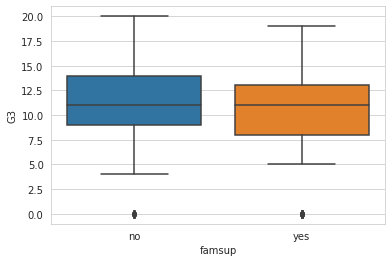

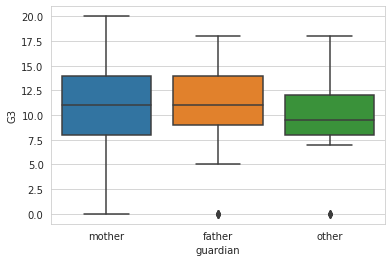

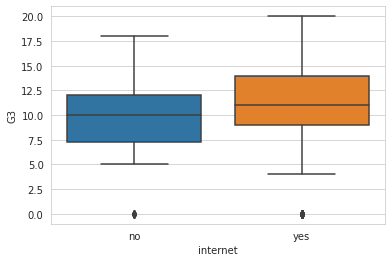

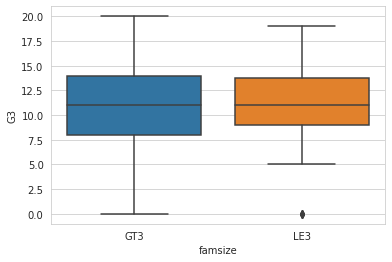

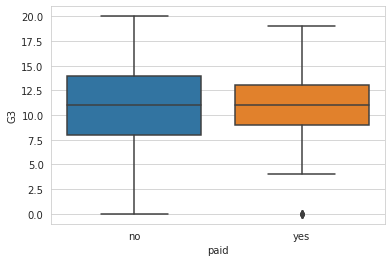

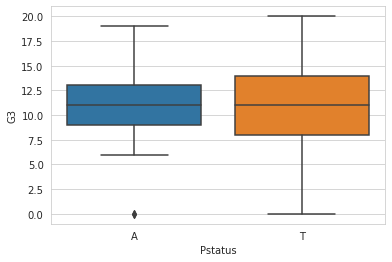

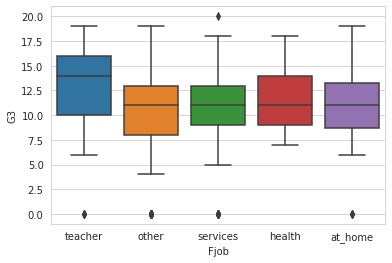

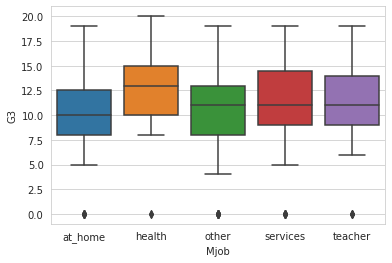

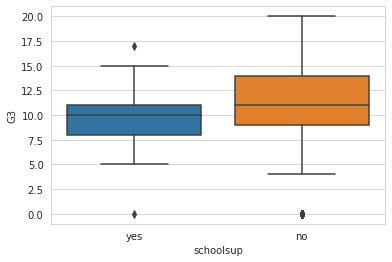

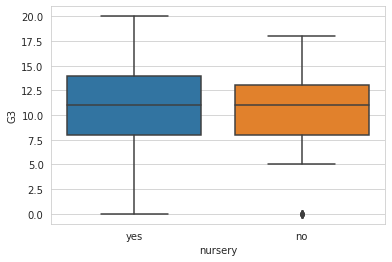

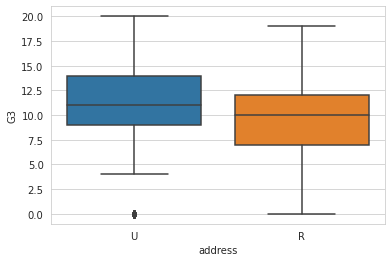

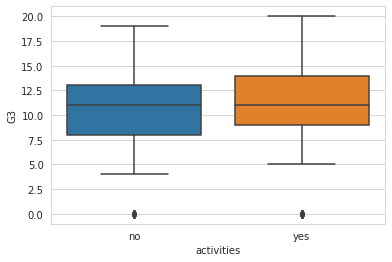

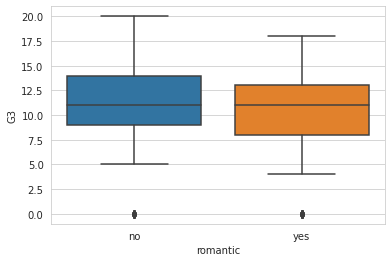

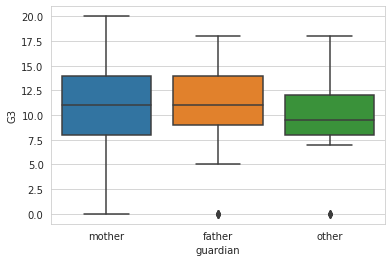

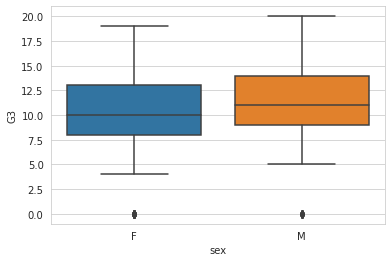

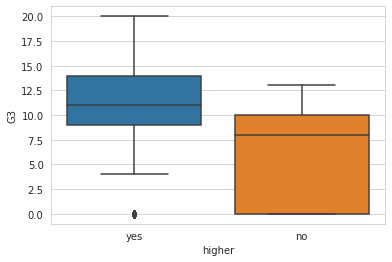

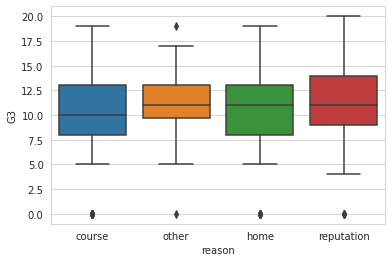

In [11]:
for qlt_col in students_columns:
    sns.set_style("whitegrid")
    sns.boxplot(x = f'{qlt_col}', y = 'G3', data = (students))
    plt.show();

Interpretaremos os resultados acima na próxima secção.

## Modelo

### Regressão Linear

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# abs(Y_test - abs(Y_pred)).mean()
print(f'Erro absoluto médio: {mean_absolute_error(Y_test, Y_pred)}')
print(f'Raiz do erro quadrático médio: {mean_squared_error(Y_test, Y_pred)**0.5}')
print(f'R²: {r2_score(Y_test, Y_pred)}')



### Resultados para 10 ciclos - Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

resultados = []

for _ in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3)
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    resultados.append([
        mean_absolute_error(Y_test, Y_pred), 
        mean_squared_error(Y_test, Y_pred)**0.5, 
        r2_score(Y_test, Y_pred)

    ])
    
resultados = np.array(resultados).mean(axis=0)
print(f'Erro absoluto médio: {resultados[0]}')
print(f'Raiz do erro quadrático médio: {resultados[1]}')
print(f'R²: {resultados[2]}')


### KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3)
model2 = KNeighborsClassifier()
model2.fit(X_train, Y_train)
Y_pred = model2.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# abs(Y_test - abs(Y_pred)).mean()
print(f'Erro absoluto médio: {mean_absolute_error(Y_test, Y_pred)}')
print(f'Raiz do erro quadrático médio: {mean_squared_error(Y_test, Y_pred)**0.5}')
print(f'R²: {r2_score(Y_test, Y_pred)}')


### Resultados para 10 ciclos - KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

resultadosKNN = []

for _ in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3)
    model2 = KNeighborsClassifier()
    model2.fit(X_train, Y_train)
    Y_pred = model2.predict(X_test)
    resultadosKNN.append([
        mean_absolute_error(Y_test, Y_pred), 
        mean_squared_error(Y_test, Y_pred)**0.5, 
        r2_score(Y_test, Y_pred)

    ])
    
resultadosKNN = np.array(resultadosKNN).mean(axis=0)
print(f'Erro absoluto médio: {resultadosKNN[0]}')
print(f'Raiz do erro quadrático médio: {resultadosKNN[1]}')
print(f'R²: {resultadosKNN[2]}')

## Referências Bibliográficas

- to-do